<a href="https://colab.research.google.com/github/yurikomuta/movement/blob/main/movement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibs

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


# Dataset

In [109]:
df_conversion = pd.read_excel('/content/Conversão.xlsx')
df_conversion.head()

,Limite no Cartão,% Limite no Cartão Conversão,Unnamed: 2,Unnamed: 3,Faixa de Renda,% Faixa de Renda Conversão,Gasto Mensal,% Gasto Mensal Conversão
0,Não tem cartão,0.0012,NaN,NaN,Até 2.000,0.0032,Até 1.000,0.0022
1,Até 1.600 limite,0.0020,NaN,NaN,2.000 a 3.000,0.0077,De 1.000 a 2.000,0.0056
2,De 1.600 a 3.000,0.0021,NaN,NaN,3.000 a 5.000,0.0098,De 2.000 a 3.000,0.0075
3,De 3.000 a 5.000,0.0054,NaN,NaN,5.000 a 10.000,0.0191,De 3.000 a 5.000,0.0123
4,De 5.000 a 10.000,0.0083,NaN,NaN,10.000 a 20.000,0.0209,De 5.000 a 9.999,0.0199


In [110]:
df_conversion = df_conversion.dropna(axis=1, how='all') # deletando colunas com dados vazios
df_conversion.head()


,Limite no Cartão,% Limite no Cartão Conversão,Faixa de Renda,% Faixa de Renda Conversão,Gasto Mensal,% Gasto Mensal Conversão
0,Não tem cartão,0.0012,Até 2.000,0.0032,Até 1.000,0.0022
1,Até 1.600 limite,0.0020,2.000 a 3.000,0.0077,De 1.000 a 2.000,0.0056
2,De 1.600 a 3.000,0.0021,3.000 a 5.000,0.0098,De 2.000 a 3.000,0.0075
3,De 3.000 a 5.000,0.0054,5.000 a 10.000,0.0191,De 3.000 a 5.000,0.0123
4,De 5.000 a 10.000,0.0083,10.000 a 20.000,0.0209,De 5.000 a 9.999,0.0199


In [121]:

# Substituindo o caractere '%' e convertendo para float
df_conversion['% Limite no Cartão Conversão'] = df_conversion['% Limite no Cartão Conversão'].str.rstrip('%').astype('float') / 100
df_conversion['% Faixa de Renda Conversão'] = df_conversion['% Faixa de Renda Conversão'].str.rstrip('%').astype('float') / 100
df_conversion['% Gasto Mensal Conversão '] = df_conversion['% Gasto Mensal Conversão '].str.rstrip('%').astype('float') / 100

# Formatando para exibir duas casas decimais após a vírgula
df_conversion['% Limite no Cartão Conversão'] = df_conversion['% Limite no Cartão Conversão'].map('{:.2%}'.format)
df_conversion['% Faixa de Renda Conversão'] = df_conversion['% Faixa de Renda Conversão'].map('{:.2%}'.format)
df_conversion['% Gasto Mensal Conversão '] = df_conversion['% Gasto Mensal Conversão '].map('{:.2%}'.format)

df_conversion


,Limite no Cartão,% Limite no Cartão Conversão,Faixa de Renda,% Faixa de Renda Conversão,Gasto Mensal,% Gasto Mensal Conversão
0,Não tem cartão,0.10%,Até 2.000,0.30%,Até 1.000,0.20%
1,Até 1.600 limite,0.20%,2.000 a 3.000,0.80%,De 1.000 a 2.000,0.60%
2,De 1.600 a 3.000,0.20%,3.000 a 5.000,1.00%,De 2.000 a 3.000,0.80%
3,De 3.000 a 5.000,0.50%,5.000 a 10.000,1.90%,De 3.000 a 5.000,1.20%
4,De 5.000 a 10.000,0.80%,10.000 a 20.000,2.10%,De 5.000 a 9.999,2.00%
5,De 10.000 a 20.000,1.40%,Acima de 20.000,2.90%,De 10.000 a 20.000,2.10%
6,Mais de 20.000,2.40%,NaN,nan%,Acima de 20.000,3.60%


In [54]:
df = pd.read_excel('/content/Banco de Dados_2023.xlsx')
df.head()

,ID,Qual é a sua idade?,Qual o seu sexo?,E o seu estado civil?,Você tem filho(s)?,Você já participou de algum outro evento online sobre Milhas?,Qual seu nível de conhecimento sobre Milhas?,Me responda agora o que são Milhas Aéreas para você?,Atualmente você possui cartão de crédito?,Qual o limite que você possui somando todos os seus cartões de crédito?,Quanto você ganha em média por mês?,Quanto você GASTA em média por mês?,Qual o principal obstáculo te impede de ganhar dinheiro todos os meses com o seu cartão de crédito?,Me conta aí: quais são os seus objetivos atualmente?,E o que te impede de atingir esses objetivos?,"Se você tivesse 1 hora de conversa comigo e pudesse me perguntar qualquer coisa que eu pudesse te ajudar, o que seria?","Essa pergunta é opcional e pessoal, beleza? \n\nEu quero que você seja brutalmente sincero comigo na resposta desta pergunta: \n\n""Qual o seu sonho HOJE? E no que essa nova fonte de renda de R$ 36.000 por ano te ajudaria a chegar lá?""","Ao final do Curso Gratuito, eu vou abrir algumas vagas para o meu Clube Milhas Lucrativas _(que é pago)_ onde você tem todo meu acompanhamento e direcionamento.\n\nNo entanto, será apenas para pouquíssimas pessoas. \n\nVocê tem interesse em fazer parte?",Submit Date (UTC)
0,1,De 18 a 24 anos,Feminino,Solteiro(a),Não tenho,"Não, é a primeira vez que participo de qualque...","Já conheço sobre Pontos, mas ainda não sei qua...",.,"Sim, tenho 1 cartão de crédito",De R$ 5.000 a R$ 10.000 de limite,De R$2001 a R$3000,De R$ 1.001 a R$ 2.000,Não sei como funciona e não entendo nada. Me s...,.,.,.,.,Não tenho nenhum interesse.,2023-01-19 17:09:01
1,2,De 25 a 34 anos,Masculino,Solteiro(a),Não tenho,"Não, é a primeira vez que participo de qualque...",Já sei o que são Milhas e já troquei por passa...,Milhas são as distancias que os aviões percorr...,"Sim, tenho entre 2 e 3 cartões de crédito",De R$ 1.601 a R$ 3.000 de limite,De R$1001 a R$2000,Até R$ 1.000,Acho que tem que gastar muito pra ter uma rend...,Construir um chalé num lugar remoto.,Dinheiro e tempo,Como ganhar muitas milhas e reverter em grana ...,Independência financeira.,Não tenho nenhum interesse.,2023-01-19 17:08:27
2,3,De 18 a 24 anos,Feminino,Casado(a),Não tenho,"Sobre milhas não, mas já participei de outros ...","Já conheço sobre Pontos, mas ainda não sei qua...",Tipo um bônus por usar o cartão,"Sim, tenho pelo menos 4 cartões de crédito",De R$ 5.000 a R$ 10.000 de limite,"Até R$1000,00",De R$ 1.001 a R$ 2.000,Acho que tem que gastar muito pra ter uma rend...,Uma renda a mais,Dinheiro,É possivel eu ter milhas/pontos acumulados tod...,Casa própria,Gostaria de mais informações.,2023-01-19 17:07:29
3,4,De 45 a 54 anos,Feminino,Divorciado(a),"Sim, tenho 2","Sobre milhas não, mas já participei de outros ...","Sei o que são Milhas, mas nunca fiz nada com a...","Pontos que podem ser utilizados em viagens, po...","Sim, tenho 1 cartão de crédito",De R$ 5.000 a R$ 10.000 de limite,De R$3001 a R$5000,De R$ 3.001 a R$ 5.000,"Não tenho tempo, meu dia é muito corrido.",Usar milhas,Falta de conhecimento,Como acumular e utilizar milhas,NaN,Gostaria de mais informações.,2023-01-19 17:06:49
4,5,De 35 a 44 anos,Masculino,Casado(a),Não tenho,"Sobre milhas não, mas já participei de outros ...",Já sei o que são Milhas e já troquei por passa...,São parcela do que pago nos produtos e serviço...,"Sim, tenho entre 2 e 3 cartões de crédito",Mais de R$ 20.000 de limite,De R$10.000 a R$20.000,De R$ 5.001 a R$ 9.999,Acho que tem que gastar muito pra ter uma rend...,Quitar as dívidas.,Preciso de renda extra.,"Qual o risco desse mercado sumir, por restriçõ...","Quitar as dívidas, trocar de carro, ajudar mai...",Gostaria de mais informações.,2023-01-19 17:06:36


In [56]:
#corrigir na coluna 1 valores De 18 a 24 anos para 18-24, De 25 a 34 anos para 25-34, De 35 a 44 anos para 35 - 44 , De 45 a 54 anos para  45 -54, Mais de 55 anos para 55 +,

df.iloc[:, 1] = df.iloc[:, 1].replace({
    'De 18 a 24 anos': '18-24',
    'De 25 a 34 anos': '25-34',
    'De 35 a 44 anos': '35-44',
    'De 45 a 54 anos': '45-54',
    'Mais de 55 anos': '55+',
    'Menos que 18 anos': '<18',
})
df.head()


,ID,Qual é a sua idade?,Qual o seu sexo?,E o seu estado civil?,Você tem filho(s)?,Você já participou de algum outro evento online sobre Milhas?,Qual seu nível de conhecimento sobre Milhas?,Me responda agora o que são Milhas Aéreas para você?,Atualmente você possui cartão de crédito?,Qual o limite que você possui somando todos os seus cartões de crédito?,Quanto você ganha em média por mês?,Quanto você GASTA em média por mês?,Qual o principal obstáculo te impede de ganhar dinheiro todos os meses com o seu cartão de crédito?,Me conta aí: quais são os seus objetivos atualmente?,E o que te impede de atingir esses objetivos?,"Se você tivesse 1 hora de conversa comigo e pudesse me perguntar qualquer coisa que eu pudesse te ajudar, o que seria?","Essa pergunta é opcional e pessoal, beleza? \n\nEu quero que você seja brutalmente sincero comigo na resposta desta pergunta: \n\n""Qual o seu sonho HOJE? E no que essa nova fonte de renda de R$ 36.000 por ano te ajudaria a chegar lá?""","Ao final do Curso Gratuito, eu vou abrir algumas vagas para o meu Clube Milhas Lucrativas _(que é pago)_ onde você tem todo meu acompanhamento e direcionamento.\n\nNo entanto, será apenas para pouquíssimas pessoas. \n\nVocê tem interesse em fazer parte?",Submit Date (UTC)
0,1,18-24,Feminino,Solteiro(a),Não tenho,"Não, é a primeira vez que participo de qualque...","Já conheço sobre Pontos, mas ainda não sei qua...",.,"Sim, tenho 1 cartão de crédito",De R$ 5.000 a R$ 10.000 de limite,De R$2001 a R$3000,De R$ 1.001 a R$ 2.000,Não sei como funciona e não entendo nada. Me s...,.,.,.,.,Não tenho nenhum interesse.,2023-01-19 17:09:01
1,2,25-34,Masculino,Solteiro(a),Não tenho,"Não, é a primeira vez que participo de qualque...",Já sei o que são Milhas e já troquei por passa...,Milhas são as distancias que os aviões percorr...,"Sim, tenho entre 2 e 3 cartões de crédito",De R$ 1.601 a R$ 3.000 de limite,De R$1001 a R$2000,Até R$ 1.000,Acho que tem que gastar muito pra ter uma rend...,Construir um chalé num lugar remoto.,Dinheiro e tempo,Como ganhar muitas milhas e reverter em grana ...,Independência financeira.,Não tenho nenhum interesse.,2023-01-19 17:08:27
2,3,18-24,Feminino,Casado(a),Não tenho,"Sobre milhas não, mas já participei de outros ...","Já conheço sobre Pontos, mas ainda não sei qua...",Tipo um bônus por usar o cartão,"Sim, tenho pelo menos 4 cartões de crédito",De R$ 5.000 a R$ 10.000 de limite,"Até R$1000,00",De R$ 1.001 a R$ 2.000,Acho que tem que gastar muito pra ter uma rend...,Uma renda a mais,Dinheiro,É possivel eu ter milhas/pontos acumulados tod...,Casa própria,Gostaria de mais informações.,2023-01-19 17:07:29
3,4,45-54,Feminino,Divorciado(a),"Sim, tenho 2","Sobre milhas não, mas já participei de outros ...","Sei o que são Milhas, mas nunca fiz nada com a...","Pontos que podem ser utilizados em viagens, po...","Sim, tenho 1 cartão de crédito",De R$ 5.000 a R$ 10.000 de limite,De R$3001 a R$5000,De R$ 3.001 a R$ 5.000,"Não tenho tempo, meu dia é muito corrido.",Usar milhas,Falta de conhecimento,Como acumular e utilizar milhas,NaN,Gostaria de mais informações.,2023-01-19 17:06:49
4,5,35-44,Masculino,Casado(a),Não tenho,"Sobre milhas não, mas já participei de outros ...",Já sei o que são Milhas e já troquei por passa...,São parcela do que pago nos produtos e serviço...,"Sim, tenho entre 2 e 3 cartões de crédito",Mais de R$ 20.000 de limite,De R$10.000 a R$20.000,De R$ 5.001 a R$ 9.999,Acho que tem que gastar muito pra ter uma rend...,Quitar as dívidas.,Preciso de renda extra.,"Qual o risco desse mercado sumir, por restriçõ...","Quitar as dívidas, trocar de carro, ajudar mai...",Gostaria de mais informações.,2023-01-19 17:06:36


In [ ]:
# prompt: de acordo com df_conersion e df, calcule o lead score de cada lead

# Criando um dicionário para mapear os pesos de cada característica
pesos = {
    'Faixa Etária': {
        '18-24': 1,
        '25-34': 2,
        '35-44': 3,
        '45-54': 2,
        '55+': 1,
        '<18': 0
    },
    'Estado Civil': {
        'Solteiro(a)': 1,
        'Casado(a)': 2,
        'Divorciado(a)': 1,
        'Viúvo(a)': 1,
        'Outro': 0
    },
    'Escolaridade': {
        'Ensino Fundamental Incompleto': 0,
        'Ensino Fundamental Completo': 1,
        'Ensino Médio Incompleto': 1,
        'Ensino Médio Completo': 2,
        'Ensino Superior Incompleto': 3,
        'Ensino Superior Completo': 4,
        'Pós-Graduação': 5,
        'Mestrado': 6,
        'Doutorado': 7
    },
    'Renda Familiar': {
        'Até R$ 1.000': 1,
        'De R$ 1.001 a R$ 2.000': 2,
        'De R$ 2.001 a R$ 3.000': 3,
        'De R$ 3.001 a R$ 5.000': 4,
        'De R$ 5.001 a R$ 10.000': 5,
        'Acima de R$ 10.000': 6
    },
    'Interesse': {
        'Baixo': 1,
        'Médio': 2,
        'Alto': 3
    },
    'Página de Origem': {
        'Facebook': 1,
        'Instagram': 2,
        'Google': 3,
        'Outros': 0
    },
    'Tempo no Site': {
        'Menos de 1 minuto': 1,
        'De 1 a 5 minutos': 2,
        'De 6 a 10 minutos': 3,
        'Mais de 10 minutos': 4
    },
    'Número de Páginas Visitadas': {
        '1': 1,
        '2-3': 2,
        '4-5': 3,
        'Mais de 5': 4
    },
    'Ações Realizadas': {
        'Nenhuma': 0,
        'Download de Material': 1,
        'Preenchimento de Formulário': 2,
        'Assistiu a um Webinar': 3,
        'Contato por Telefone': 4
    }
}

# Calculando o Lead Score para cada lead
df['Lead Score'] = 0
for index, row in df.iterrows():
    for coluna in pesos.keys():
        if row[coluna] in pesos[coluna]:
            df.loc[index, 'Lead Score'] += pesos[coluna][row[coluna]]

# Exibindo o DataFrame com o Lead Score calculado
print(df[['Nome', 'Lead Score']])


# **Motivos Homens**

In [58]:
# Filtrar o DataFrame para incluir apenas homens
homens_df = df[df[df.columns[2]] == 'Masculino']

# Agrupar os dados da coluna 12 (motivos) e 13 (sonhos) para homens e contar a frequência
motivos_homens = homens_df[df.columns[12]].value_counts()
sonhos_homens = homens_df[df.columns[13]].value_counts()

# Imprimir as principais dores (motivos) e desejos (sonhos) dos homens
print("Principais dores dos homens:")
print(motivos_homens.head())
print("\nPrincipais desejos dos homens:")
print(sonhos_homens.head())

Principais dores dos homens:
Qual o principal obstáculo te impede de ganhar dinheiro todos os meses com o seu cartão de crédito?
Não sei como funciona e não entendo nada. Me sinto perdido com todas essas informações    6125
Acho que tem que gastar muito pra ter uma renda extra com cartão                          2458
Não tenho tempo, meu dia é muito corrido.                                                 1592
Não tenho dinheiro, minhas dívidas são maiores do que eu ganho.                            969
Tenho medo e insegurança quando o assunto é dinheiro, isso me paralisa.                    714
Name: count, dtype: int64

Principais desejos dos homens:
Me conta aí: quais são os seus objetivos atualmente?
Renda extra                 513
Viajar                      418
Ganhar dinheiro             199
Liberdade financeira        161
Independência financeira    126
Name: count, dtype: int64


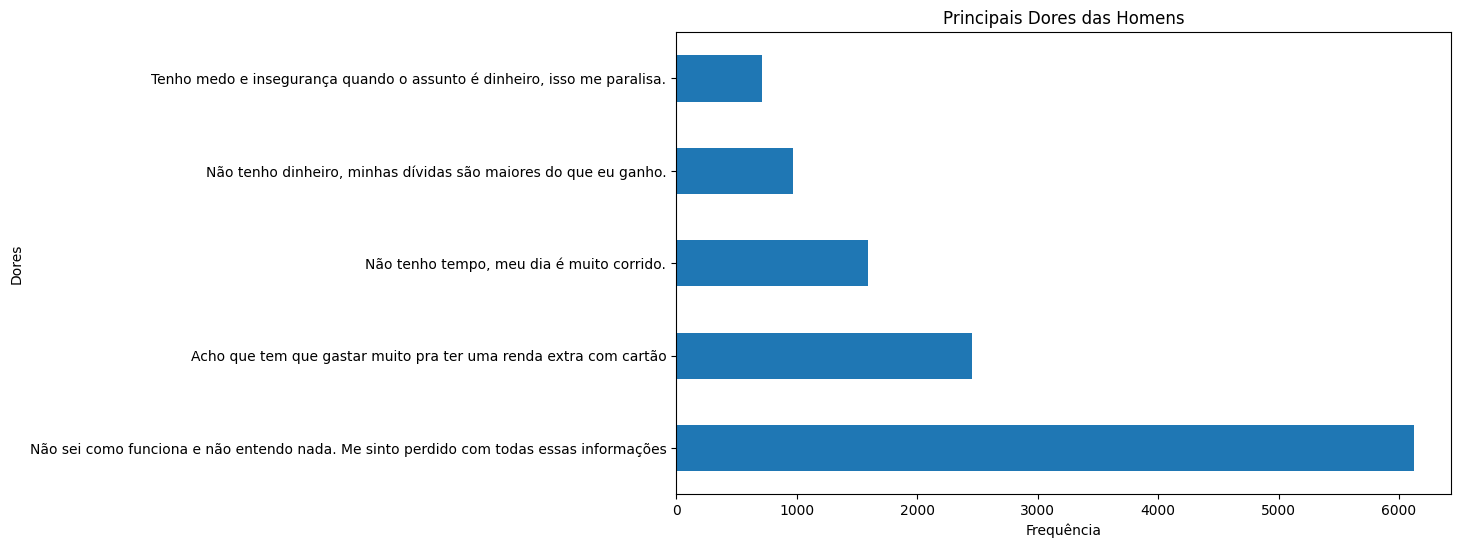

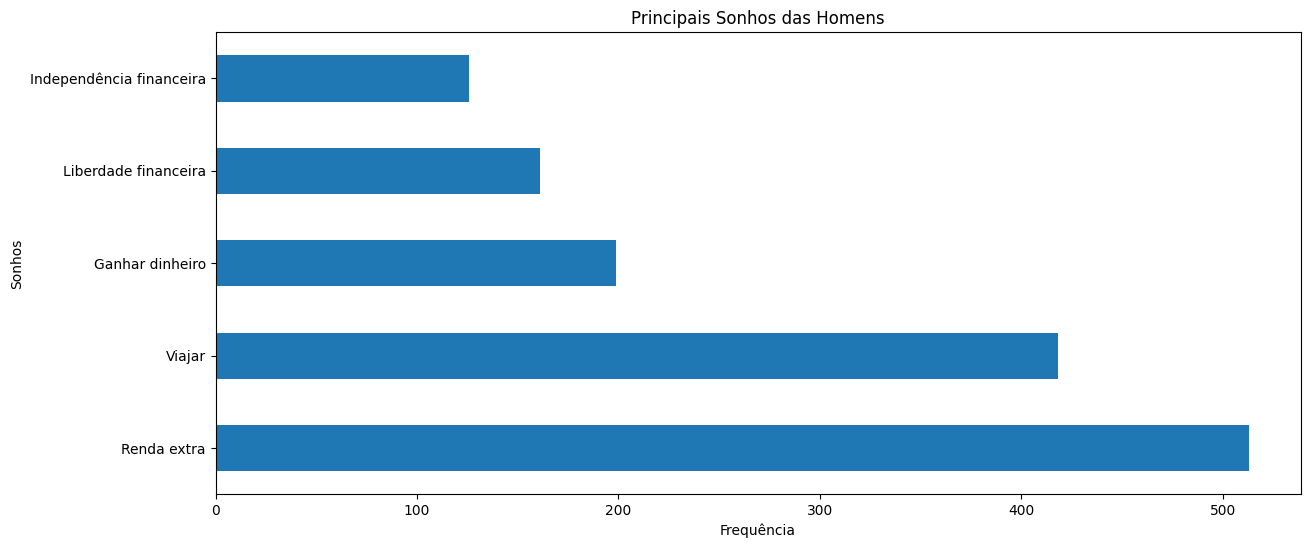

In [59]:
# Principais dores das Homens barras horizontais
plt.figure(figsize=(10, 6))
motivos_homens.head().plot(kind='barh')
plt.title('Principais Dores das Homens')
plt.xlabel('Frequência')
plt.ylabel('Dores')
plt.show()


# Principais SONHOS das Homens barras horizontais
plt.figure(figsize=(14, 6))
sonhos_homens.head().plot(kind='barh')
plt.title('Principais Sonhos das Homens')
plt.xlabel('Frequência')
plt.ylabel('Sonhos')
plt.show()

# **Motivos Mulheres**

In [60]:
# Filtrar o DataFrame para incluir apenas mulheres
mulheres_df = df[df[df.columns[2]] == 'Feminino']

# Agrupar os dados da coluna 12 (motivos) e 13 (sonhos) para mulheres e contar a frequência
motivos_mulheres = mulheres_df[df.columns[12]].value_counts()
sonhos_mulheres = mulheres_df[df.columns[13]].value_counts()

# Imprimir as principais dores (motivos) e desejos (sonhos) das mulheres
print("\nPrincipais dores das mulheres:")
print(motivos_mulheres.head())
print("\nPrincipais desejos das mulheres:")
print(sonhos_mulheres.head())


Principais dores das mulheres:
Qual o principal obstáculo te impede de ganhar dinheiro todos os meses com o seu cartão de crédito?
Não sei como funciona e não entendo nada. Me sinto perdido com todas essas informações    2039
Acho que tem que gastar muito pra ter uma renda extra com cartão                           566
Não tenho dinheiro, minhas dívidas são maiores do que eu ganho.                            457
Tenho medo e insegurança quando o assunto é dinheiro, isso me paralisa.                    330
Não tenho tempo, meu dia é muito corrido.                                                  287
Name: count, dtype: int64

Principais desejos das mulheres:
Me conta aí: quais são os seus objetivos atualmente?
Viajar                 121
Renda extra             71
Ganhar dinheiro         31
Ter uma renda extra     24
Viagens                 22
Name: count, dtype: int64


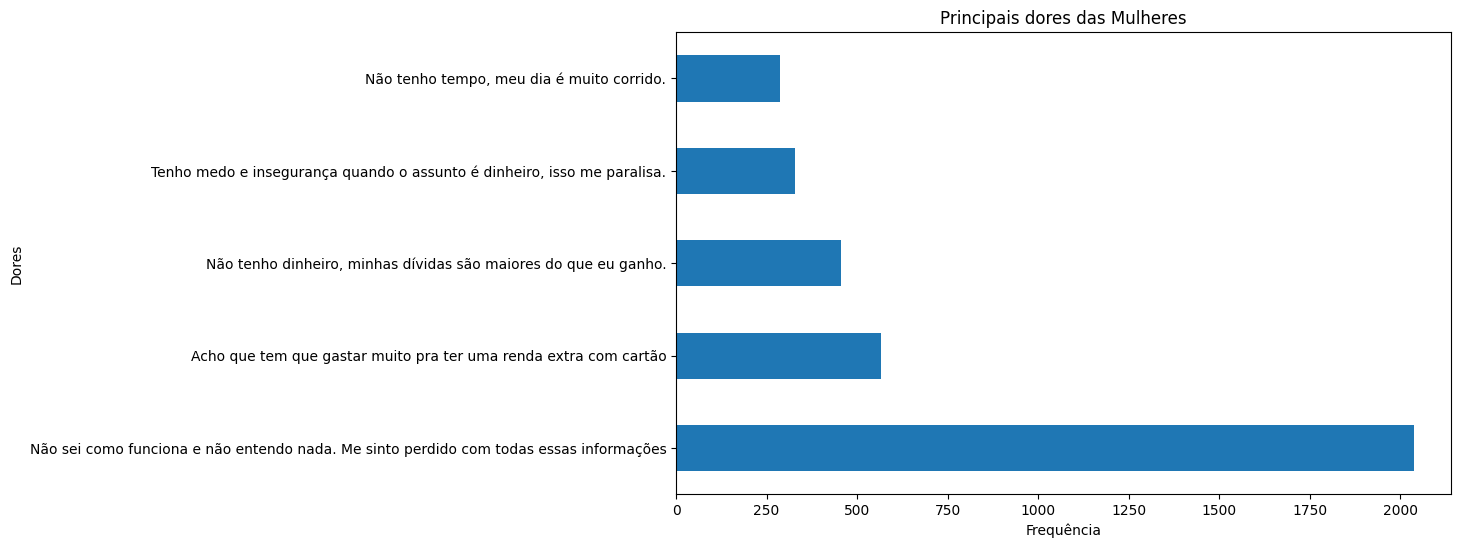

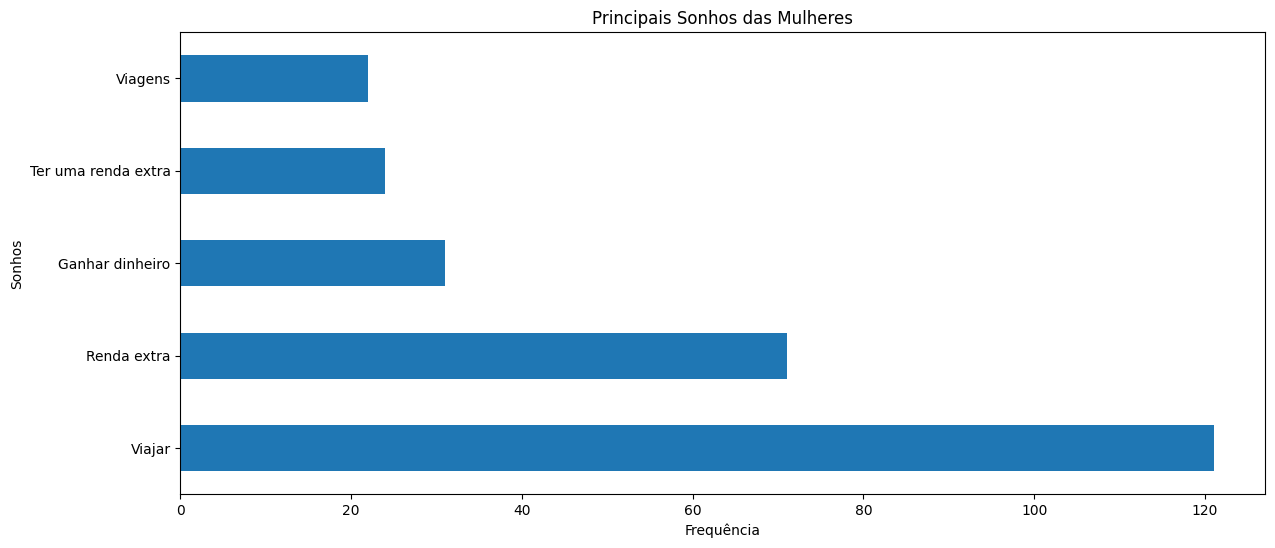

In [61]:
# Principais dores das Mulheres barras horizontais
plt.figure(figsize=(10, 6))
motivos_mulheres.head().plot(kind='barh')
plt.title('Principais dores das Mulheres')
plt.xlabel('Frequência')
plt.ylabel('Dores')
plt.show()


# Principais SONHOS das Mulheres barras horizontais
plt.figure(figsize=(14, 6))
sonhos_mulheres.head().plot(kind='barh')
plt.title('Principais Sonhos das Mulheres')
plt.xlabel('Frequência')
plt.ylabel('Sonhos')
plt.show()



# Lead Potenciais

In [62]:
#Analise dos Perfis das Pessoas
features = df[[df.columns[1], df.columns[2], df.columns[5], df.columns[6], df.columns[7], df.columns[9], df.columns[11], df.columns[12], df.columns[13]]]

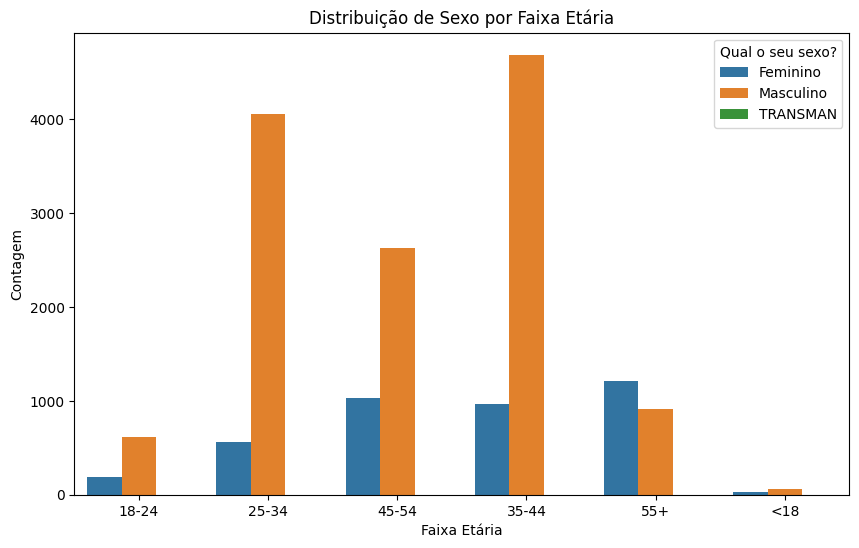

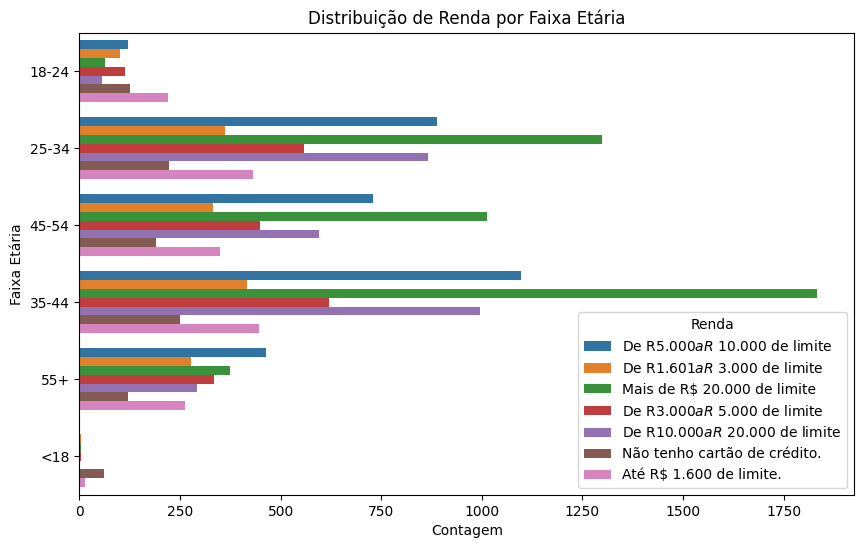

In [63]:
# Gráfico de barras para comparar a proporção de homens e mulheres em cada faixa etária
plt.figure(figsize=(10, 6))
sns.countplot(x=df.columns[1], hue=df.columns[2], data=df)
plt.title('Distribuição de Sexo por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.show()

# Gráfico de barras horizontais para visualizar a distribuição da renda em cada faixa etária
plt.figure(figsize=(10, 6))
sns.countplot(y=df.columns[1], hue=df.columns[9], data=df)
plt.title('Distribuição de Renda por Faixa Etária')
plt.ylabel('Faixa Etária')
plt.xlabel('Contagem')
plt.legend(title='Renda')
plt.show()

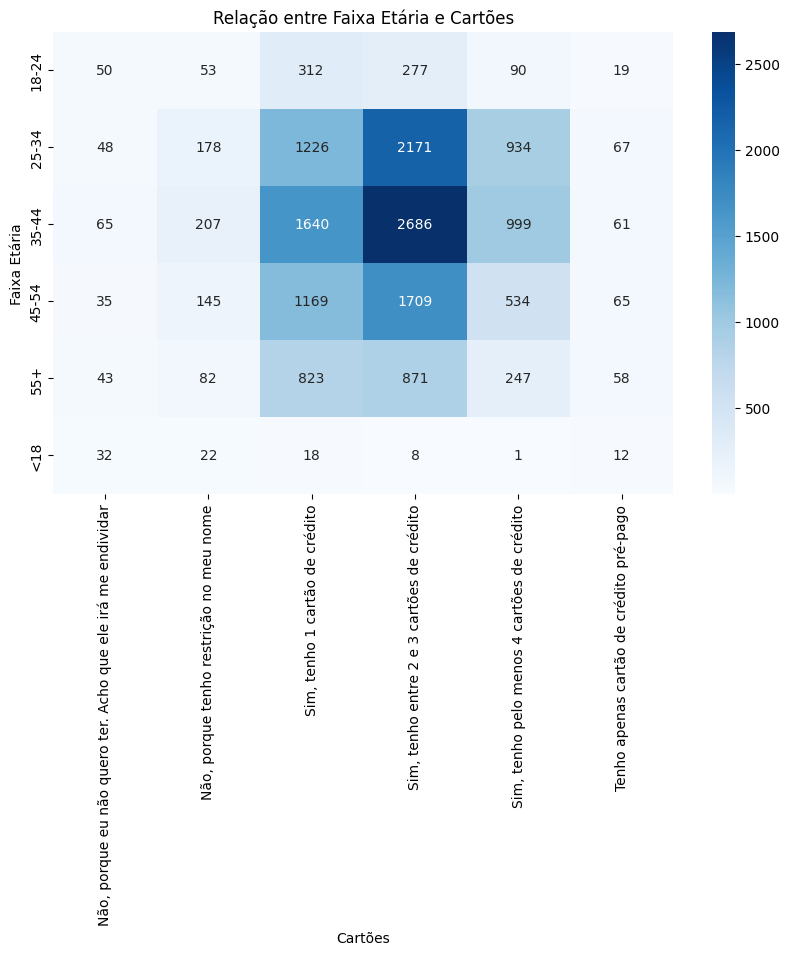

In [50]:
# Criar uma tabela de contingência entre faixa etária e cartões
contingency_table = pd.crosstab(df[df.columns[1]], df[df.columns[8]])

# Criar um heatmap a partir da tabela de contingência
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Relação entre Faixa Etária e Cartões')
plt.xlabel('Cartões')
plt.ylabel('Faixa Etária')
plt.show()

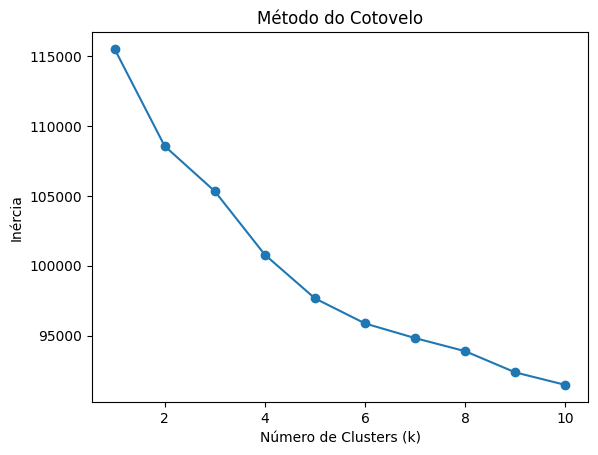

Cluster 0:
       Qual é a sua idade? Qual o seu sexo?  \
count                 5578             5574   
unique                   6                3   
top                  35-44        Masculino   
freq                  1987             4639   

       Você já participou de algum outro evento online sobre Milhas?  \
count                                                5578              
unique                                                  1              
top     Não, é a primeira vez que participo de qualque...              
freq                                                 5578              

             Qual seu nível de conhecimento sobre Milhas?  \
count                                                5578   
unique                                                  4   
top     Já conheço sobre Pontos, mas ainda não sei qua...   
freq                                                 2799   

       Me responda agora o que são Milhas Aéreas para você?  \
count                  

In [51]:
# Converter variáveis categóricas em numéricas usando one-hot encoding
features = pd.get_dummies(features, columns=[df.columns[1], df.columns[2], df.columns[5], df.columns[6], df.columns[7], df.columns[9], df.columns[11], df.columns[12], df.columns[13]])

# Encontrar o número ideal de clusters usando o método do cotovelo (ajuste o valor de k conforme necessário)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init='auto')
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()

k = 4  # Ajuste o número de clusters conforme o gráfico do método do cotovelo

# Instanciar o modelo KMeans com o número de clusters escolhido
kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')

# Ajustar o modelo aos dados
kmeans.fit(features)

# Obter os rótulos dos clusters para cada registro
labels = kmeans.labels_

# Adicionar os rótulos dos clusters ao DataFrame original
df['cluster'] = labels

# Analisar as características de cada cluster
for i in range(k):
    cluster_data = df[df['cluster'] == i]
    print(f"Cluster {i}:")
    print(cluster_data[[df.columns[1], df.columns[2], df.columns[5], df.columns[6], df.columns[7], df.columns[8], df.columns[11], df.columns[12], df.columns[13]]].describe(include='all'))
    print("\n")

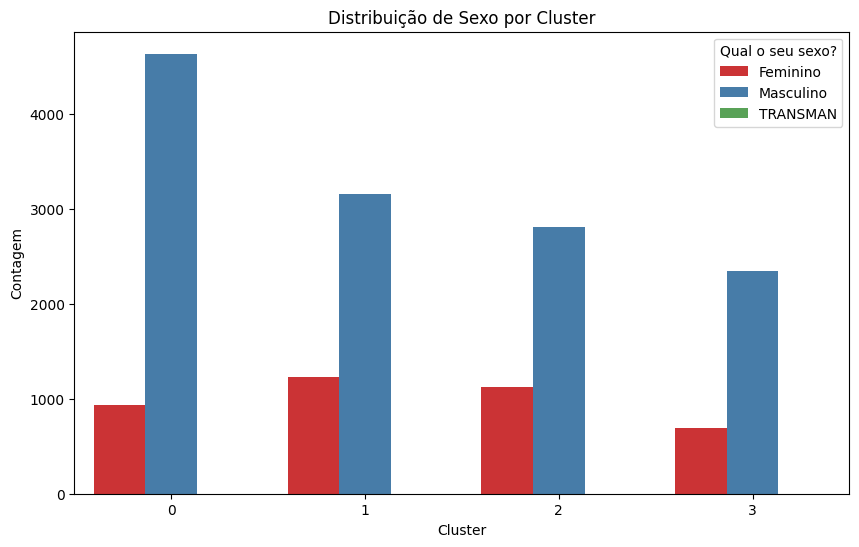

In [52]:
#comparando a distribuição de 'sexo' (coluna 2) em cada cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue=df.columns[2], data=df, palette='Set1')
plt.title('Distribuição de Sexo por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.show()



# 5. existe alguma análise relevante que não foi pedida e que você gostaria de apontar?




# 5.1.   Teriamos o cenário qual status cívil e genero são mais presentes no *público*


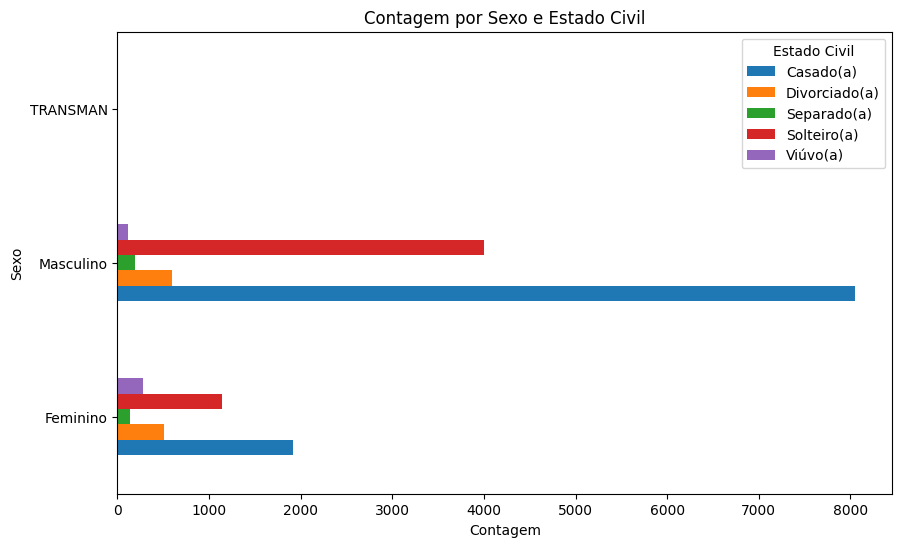

In [73]:
# Agrupa os dados pelas colunas 2 e 3 e conta as ocorrências
grouped_data = df.groupby([df.columns[2], df.columns[3]]).size().unstack(fill_value=0)

# Plota o gráfico de barras horizontais
grouped_data.plot(kind='barh', figsize=(10, 6))
plt.title('Contagem por Sexo e Estado Civil')
plt.xlabel('Contagem')
plt.ylabel('Sexo')
plt.legend(title='Estado Civil')
plt.show()


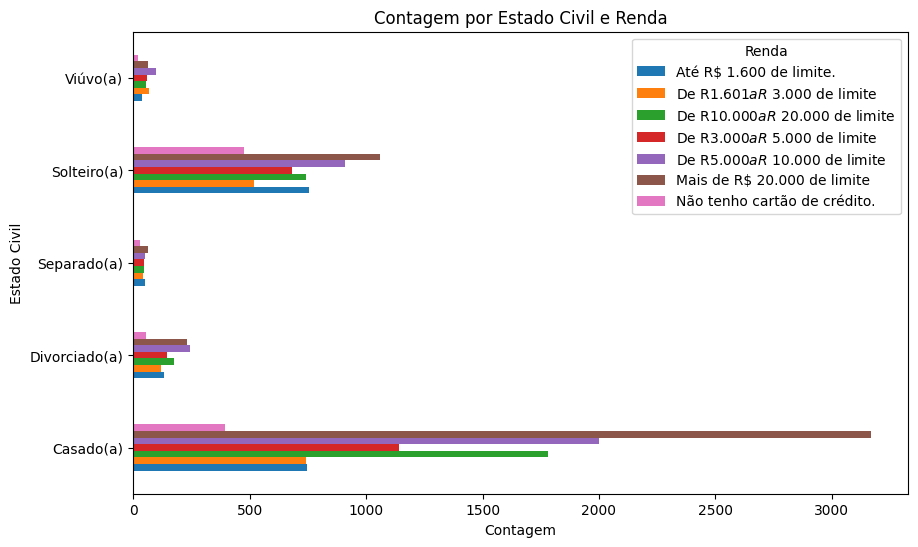

In [74]:
# Agrupa os dados pelas colunas 3 e 9 e conta as ocorrências
grouped_data = df.groupby([df.columns[3], df.columns[9]]).size().unstack(fill_value=0)

# Plota o gráfico de barras horizontais
grouped_data.plot(kind='barh', figsize=(10, 6))
plt.title('Contagem por Estado Civil e Renda')
plt.xlabel('Contagem')
plt.ylabel('Estado Civil')
plt.legend(title='Renda')
plt.show()



# 5.2.    Qual público tem maior interesse em continuar após o curso gratuito?

## Mulheres

In [91]:
# Filtrar o DataFrame para incluir apenas mulheres
mulheres_df = df[df[df.columns[2]] == 'Feminino']

# Agrupar os dados da coluna 15 (pergunta) e 16 (Clube Milhas Lucrativas) para mulheres e contar a frequência
pergunta_mulheres = mulheres_df[df.columns[15]].value_counts()
clube_mulheres = mulheres_df[df.columns[17]].value_counts()

# Imprimir as principais dores (motivos) e desejos (Clube Milhas Lucrativas) das mulheres
print("\n Se você tivesse 1 hora de conversa comigo e pudesse me perguntar qualquer coisa que eu pudesse te ajudar, o que seria?")
print(pergunta_mulheres.head())
print("\nClube Milhas Lucrativas:")
print(clube_mulheres.head())


 Se você tivesse 1 hora de conversa comigo e pudesse me perguntar qualquer coisa que eu pudesse te ajudar, o que seria?
Se você tivesse 1 hora de conversa comigo e pudesse me perguntar qualquer coisa que eu pudesse te ajudar, o que seria?
Não sei                            43
.                                  25
Como ganhar dinheiro               21
Como ganhar dinheiro com milhas    11
Como acumular milhas                9
Name: count, dtype: int64

Clube Milhas Lucrativas:
Ao final do Curso Gratuito, eu vou abrir algumas vagas para o meu Clube Milhas Lucrativas _(que é pago)_ onde você tem todo meu acompanhamento e direcionamento.\n\nNo entanto, será apenas para pouquíssimas pessoas. \n\nVocê tem interesse em fazer parte?
Gostaria de mais informações.                          2427
Sim, quero uma vaga no seu Clube Milhas Lucrativas.    1123
Não tenho nenhum interesse.                             434
Name: count, dtype: int64


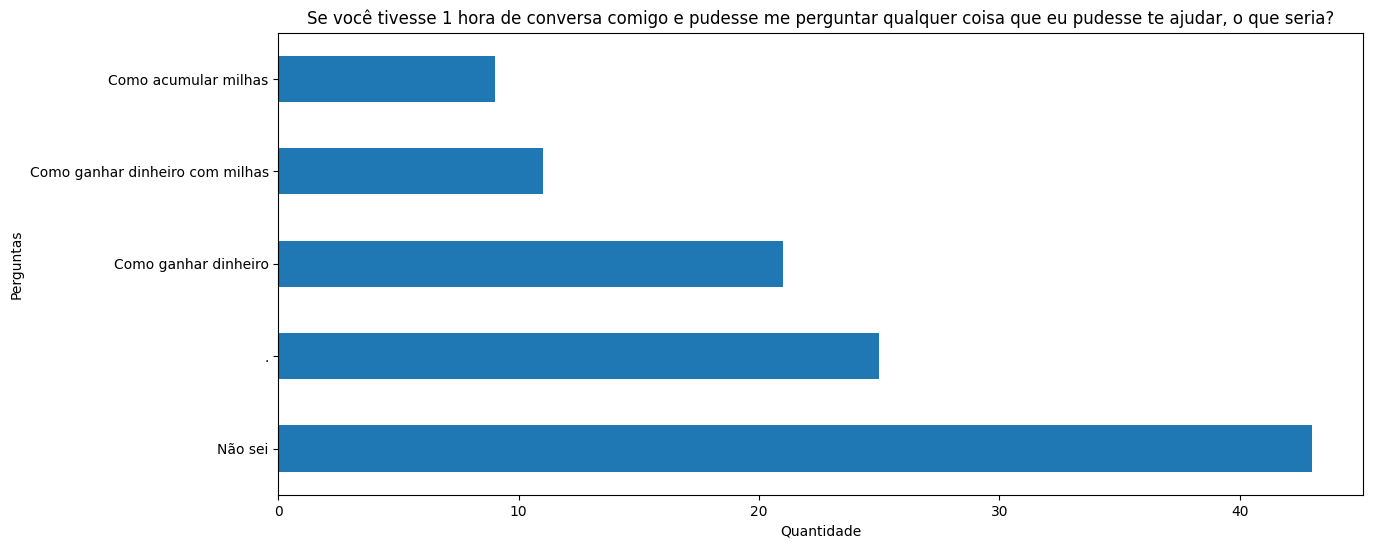

In [87]:
# Principais pergunta das Mulheres barras horizontais
plt.figure(figsize=(14, 6))
pergunta_mulheres.head().plot(kind='barh')
plt.title('Se você tivesse 1 hora de conversa comigo e pudesse me perguntar qualquer coisa que eu pudesse te ajudar, o que seria?')
plt.xlabel('Quantidade')
plt.ylabel('Perguntas')
plt.show()


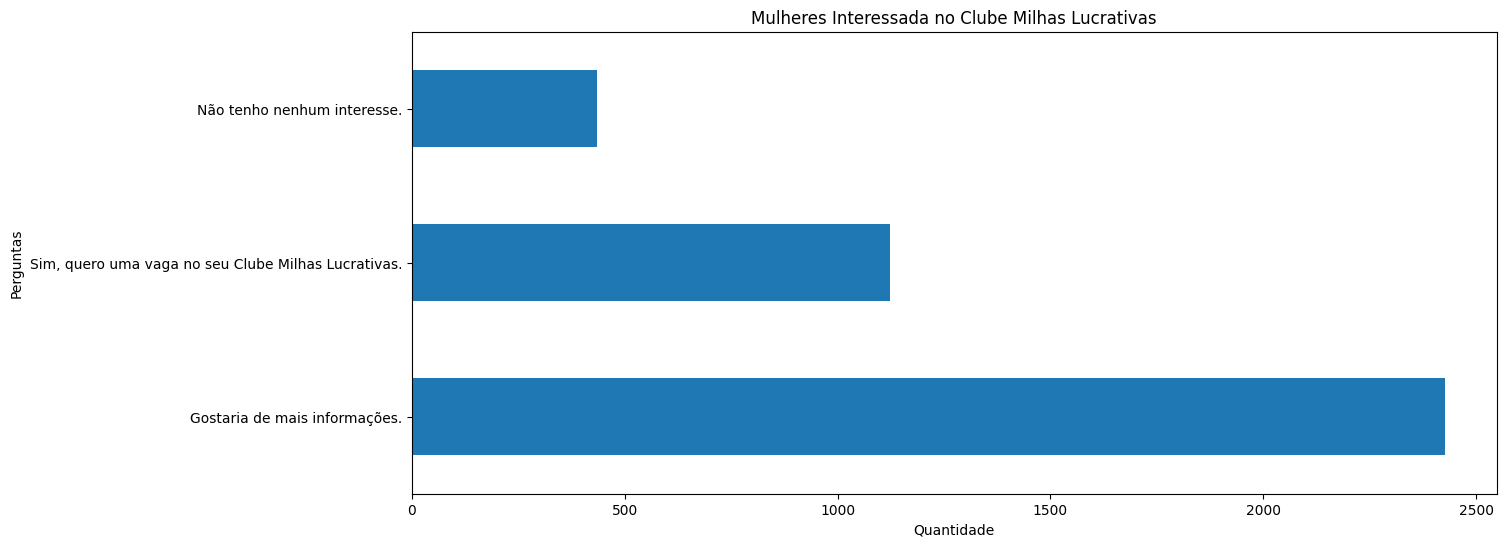

In [92]:
# Principais pergunta das Mulheres barras horizontais
plt.figure(figsize=(14, 6))
clube_mulheres.head().plot(kind='barh')
plt.title('Mulheres Interessada no Clube Milhas Lucrativas')
plt.xlabel('Quantidade')
plt.ylabel('Perguntas')
plt.show()

## Homens

In [93]:
# Filtrar o DataFrame para incluir apenas homens
homens_df = df[df[df.columns[2]] == 'Masculino']

# Agrupar os dados da coluna 15 (pergunta) e 16 (Clube Milhas Lucrativas) para homens e contar a frequência
pergunta_homens = homens_df[df.columns[15]].value_counts()
clube_homens = homens_df[df.columns[17]].value_counts()

# Imprimir as principais dores (motivos) e desejos (Clube Milhas Lucrativas) dos homens
print("\n Se você tivesse 1 hora de conversa comigo e pudesse me perguntar qualquer coisa que eu pudesse te ajudar, o que seria?")
print(pergunta_homens.head())
print("\nClube Milhas Lucrativas:")
print(clube_homens.head())


 Se você tivesse 1 hora de conversa comigo e pudesse me perguntar qualquer coisa que eu pudesse te ajudar, o que seria?
Se você tivesse 1 hora de conversa comigo e pudesse me perguntar qualquer coisa que eu pudesse te ajudar, o que seria?
Não sei                            136
.                                  101
Como ganhar dinheiro com milhas     92
Como ganhar dinheiro                68
Sim                                 37
Name: count, dtype: int64

Clube Milhas Lucrativas:
Ao final do Curso Gratuito, eu vou abrir algumas vagas para o meu Clube Milhas Lucrativas _(que é pago)_ onde você tem todo meu acompanhamento e direcionamento.\n\nNo entanto, será apenas para pouquíssimas pessoas. \n\nVocê tem interesse em fazer parte?
Gostaria de mais informações.                          6973
Sim, quero uma vaga no seu Clube Milhas Lucrativas.    4214
Não tenho nenhum interesse.                            1773
Name: count, dtype: int64


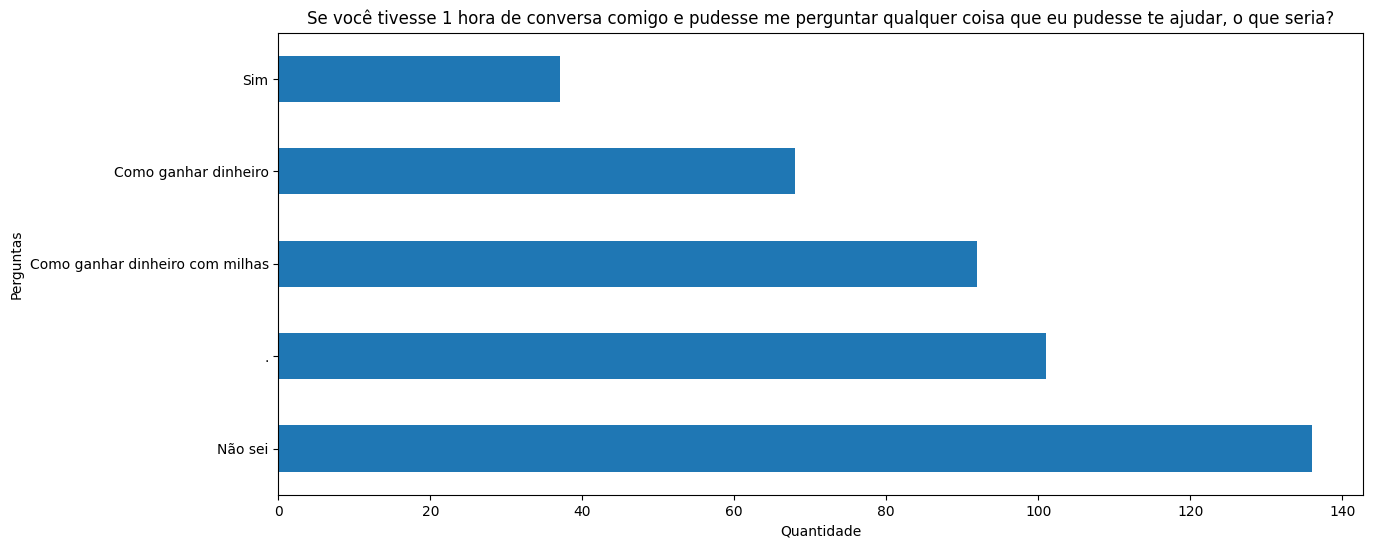

In [94]:
# Principais pergunta dos Homens barras horizontais
plt.figure(figsize=(14, 6))
pergunta_homens.head().plot(kind='barh')
plt.title('Se você tivesse 1 hora de conversa comigo e pudesse me perguntar qualquer coisa que eu pudesse te ajudar, o que seria?')
plt.xlabel('Quantidade')
plt.ylabel('Perguntas')
plt.show()

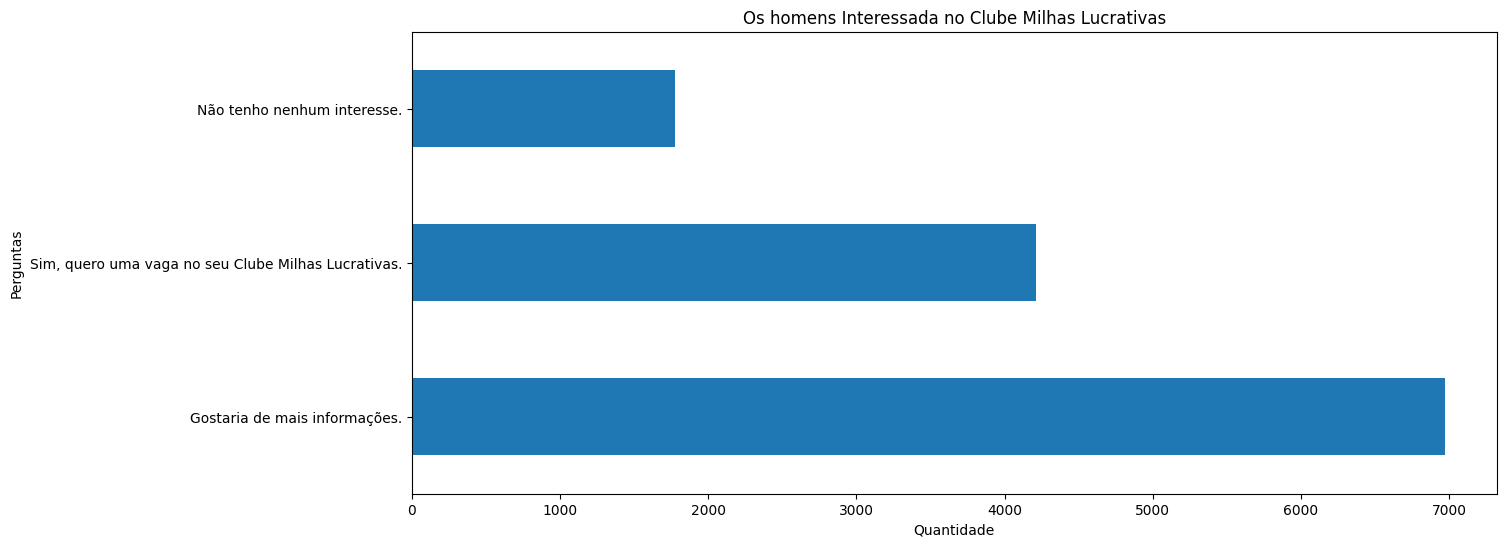

In [97]:
# Principais pergunta dos Homens barras horizontais
plt.figure(figsize=(14, 6))
clube_homens.head().plot(kind='barh')
plt.title('Os homens Interessada no Clube Milhas Lucrativas')
plt.xlabel('Quantidade')
plt.ylabel('Perguntas')
plt.show()



# 5.3.   Relação de pessoas que já conhecem as milhas e os sonhos


In [101]:
# Crie uma tabela de contingência
contingency_table = pd.crosstab(df[df.columns[6]], df[df.columns[13]])

# Exiba a tabela
print(contingency_table)

Me conta aí: quais são os seus objetivos atualmente?  1  8  9  3600  10000  \
Qual seu nível de conhecimento sobre Milhas?                                 
Já conheço sobre Pontos, mas ainda não sei qual...    1  0  0     0      0   
Já fiz operações com milhas e coloquei dinheiro...    0  0  0     0      0   
Já sei o que são Milhas e já troquei por passag...    1  0  0     0      0   
Não fazia a menor ideia que existia pontos e mi...    0  1  1     1      1   
Sei o que são Milhas, mas nunca fiz nada com as...    0  0  0     0      0   

Me conta aí: quais são os seus objetivos atualmente?  100000  $  $$  $$$  \
Qual seu nível de conhecimento sobre Milhas?                               
Já conheço sobre Pontos, mas ainda não sei qual...         0  1   1    0   
Já fiz operações com milhas e coloquei dinheiro...         0  0   0    0   
Já sei o que são Milhas e já troquei por passag...         0  0   1    3   
Não fazia a menor ideia que existia pontos e mi...         0  2   0    0 

In [103]:
# Realiza o teste Chi-Quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Exiba os resultados
print(f"Chi-Quadrado: {chi2}")
print(f"Valor-p: {p}")

# Interprete os resultados
if p < 0.05:
    print("Existe uma relação estatisticamente significativa entre o conhecimento em milhas e os sonhos dos clientes.")
else:
    print("Não existe uma relação estatisticamente significativa entre o conhecimento em milhas e os sonhos dos clientes.")

Chi-Quadrado: 45975.11679463771
Valor-p: 0.33185265690287374
Não existe uma relação estatisticamente significativa entre o conhecimento em milhas e os sonhos dos clientes.


# Lead Score

In [126]:
# Considerando a coluna 17 como a coluna de conversão
total_conversoes = df[df[df.columns[17]] != 'Não tenho nenhum interesse.'].shape[0]
total_leads = df.shape[0]
taxa_conversao = (total_conversoes / total_leads) * 100

print(f"A taxa de conversão geral é: {taxa_conversao:.2f}%")

A taxa de conversão geral é: 86.96%


In [129]:
# Calculando o lead score com base na coluna 17
df['Lead Score'] = df[df.columns[17]].apply(lambda x: 1 if x != 'Não tenho nenhum interesse.' else 0)



In [130]:
print(df['Lead Score'].value_counts())

Lead Score
1    14746
0     2211
Name: count, dtype: int64
